# Predicting the Sale Price of Bulldozers using Machine Learning

This example of machine learning uses Supervised Learning (Regression) to forecast the sale price of bulldozers.

## 1. Problem defintion
Given the characteristic of a bulldozer, would it be possible to predict the price of sale?

## 2. Data
The data is downloadedd from Kaggle bulldozer competition. 

## 3. Evaluation
The evaluation for this is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
**Goal is minimizing the RMSLE !!**

## 4. Features

Data dictionary is provided by Kaggle in the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Training and validation set
df = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

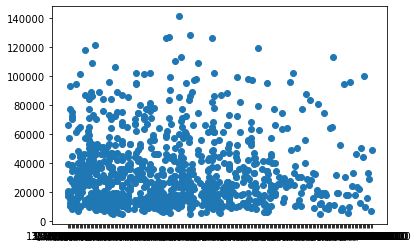

In [4]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

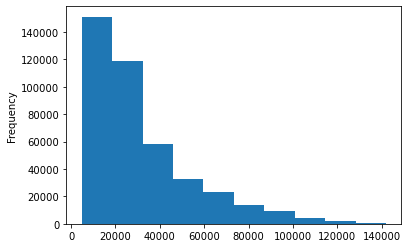

In [5]:
df.SalePrice.plot.hist() #Most of the bulldozer are below 20000 dollars

### Parsing date

Try to enrich the time & date component as much as possible - using datetime objects in pandas

In [6]:
df = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",
             low_memory = False,
             parse_dates = ["saledate"])

In [7]:
df.saledate.dtype

dtype('<M8[ns]')

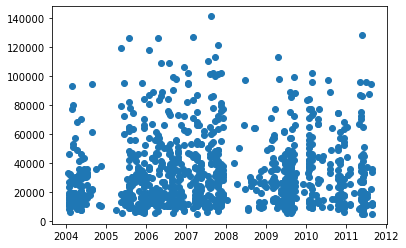

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [9]:
#Sorting DataFrame by saledate
df.sort_values(by = ["saledate"],
              inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [10]:
## We should copy our original dataframe to another dataframe to secure our current status
df_tmp = df.copy()

## Feature Engineering 
Creating a new feature or changing an existing one trying to enrich our dataset

In [11]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [12]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [13]:
# Now we've enriched our DataFrame so we will remove saledate
df_tmp.drop("saledate", axis = 1, inplace = True)

### Turn data into numbers

Convert strings to pandas categories

In [14]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [15]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [16]:
#Find column that contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered() #Assing each different category as a number

### Treating missing data

In [17]:
df_tmp.to_csv("bluebook-for-bulldozers/TrainAndValid.csv",
             index = False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


**Numeric missing values first**

In [18]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


Fill numerical values with the median

In [19]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column that tells us if data was missing
            df_tmp[label + "is_missing"] = pd.isnull(content)
            #Fill with the median
            df_tmp[label] = content.fillna(content.median())

Check if there is any null numerical value

In [20]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label) #It prints nothing so it's correctly filled

**Categorical data missing values**

In [21]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
#Turn categorical vairables into numbers
for label, contents in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(contents):
        # Add a binary column
        df_tmp[label +"_is_missing"] = pd.isnull(contents)
        df_tmp[label] = pd.Categorical(contents).codes + 1

In [23]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label) #It prints nothing so it's correctly filled

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

## 5. Modelling
 
Why not start right now to do some model-driven EDA and see if we can get to know better about the data with this approach

**RandomForestRegressor**

In [25]:
%%time
from sklearn.ensemble import RandomForestRegressor

algorithm = RandomForestRegressor(n_jobs =-1,
                           random_state = 42)
algorithm.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

Wall time: 3min 44s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
#Score the model
algorithm.score(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

0.9875468079970562

That is not a reliable metric because we have not splitted our data so we are using the same data for fit and score

### Splitting dat into train and validation sets

In [30]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [31]:
# X and Y split
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val["SalePrice"]

 ### Building an evaluation function

In [52]:
# RMSLE function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score
def rsmle(y_test, y_preds):
    """
    Calculates RMSLE
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valide MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rsmle(y_train, train_preds),
             "Valid RMSLE": rsmle(y_valid, val_preds),
             "Training R^2":r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing the model on a subset (to tune hyperparameters)

In [41]:
#alg = RandomForestRegressor(n_jobs = -1, random_state = 42)
# alg.fit(X_train, y_train) this takes far to long

%time
#Change max_samples value
alg = RandomForestRegressor(n_jobs = -1, random_state = 42, max_samples= 10000)
alg.fit(X_train, y_train)

Wall time: 0 ns


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [53]:
show_scores(alg)

{'Training MAE': 5561.2988092240585,
 'Valide MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

In [61]:
## Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
##Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                             param_distributions = rf_grid,
                             n_iter = 100,
                             cv = 5,
                             verbose = True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
#Find the best model hyperparameters found in 100 iterations
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 4,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [63]:
show_scores(rs_model)

{'Training MAE': 5585.81690569117,
 'Valide MAE': 7195.698151508461,
 'Training RMSLE': 0.2587195017627535,
 'Valid RMSLE': 0.2941602998430672,
 'Training R^2': 0.8592588916229797,
 'Valid R^2': 0.8307569854105894}

In [64]:
#Ideal model according to RandomizedSearchCV with 100 iterations
ideal_model = RandomForestRegressor(n_estimators = 90,
                                   min_samples_leaf =1,
                                   min_samples_split=4,
                                   max_features='auto',
                                   n_jobs=-1,
                                   max_samples = None,
                                   random_state= 42)
#Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=90, n_jobs=-1,
                      random_state=42)

In [65]:
show_scores(ideal_model)

{'Training MAE': 1754.6288146096363,
 'Valide MAE': 6129.916878655679,
 'Training RMSLE': 0.09352985960871188,
 'Valid RMSLE': 0.25608468253554945,
 'Training R^2': 0.9840634881892165,
 'Valid R^2': 0.8722654995780188}

In [92]:
## Ideal model to make predictions on our test data
df_test = pd.read_csv("bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                      parse_dates=["saledate"])

In [93]:
## Preprocessing the data (test dataset in the same format)

def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis = 1, inplace= True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary column that tells us if data was missing
                df[label + "_is_missing"] = pd.isnull(content)
                #Fill with the median
                df[label] = content.fillna(content.median())
        else:
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df 

In [94]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [95]:
df_test["auctioneerID_is_missing"] = False

## Making predictions on the test data

In [96]:
test_preds = ideal_model.predict(df_test)

Set predictions to the format kaggle asks for:

In [97]:
df_preds = pd.DataFrame()
df_preds["Sales ID"] = df_test["SalesID"]
df_preds["Sales Price"] = test_preds
df_preds.to_csv("test_predictions.csv", index = False)

### Feature importance
    Figuring out which features were more important when predicting the target variable (Sale Price)

In [99]:
len(ideal_model.feature_importances_)

102

In [110]:
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
            .sort_values("feature_importances", ascending=False)
            .reset_index(drop = True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

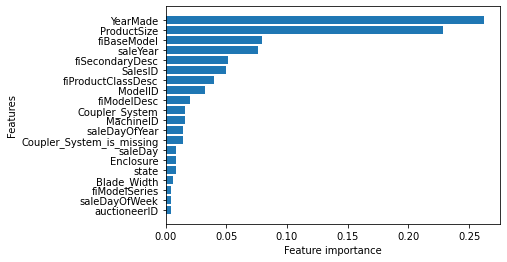

In [111]:
plot_features(X_train.columns, ideal_model.feature_importances_)